In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
from problem import get_24h_cgm_data, _read_clinical_data_and_labels

This function allows to obtain a dataframe with 24h of CGM data. A lot of patients actually have 48h of CGM data. Therefore, the indexes are separated in 2 : 3_1 corresponds to the first day of data for the patient of index 3, 3_2 to his/her second day of data.

In [31]:
cgm_24h = get_24h_cgm_data(user_id_list=[i for i in range(1, 209)], path='../')
cgm_24h.head()

,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,00:45,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55
1_1,86.0,81.0,78.0,76.0,76.0,77.0,78.0,80.0,81.0,82.0,...,148.0,147.0,145.0,142.0,139.0,134.0,129.0,123.0,117.0,111.0
1_2,107.0,105.0,104.0,103.0,103.0,103.0,104.0,105.0,106.0,107.0,...,128.0,127.0,126.0,126.0,126.0,126.0,124.0,121.0,116.0,110.0
2_1,167.0,163.0,158.0,151.0,144.0,137.0,132.0,127.0,125.0,125.0,...,108.0,106.0,103.0,100.0,97.0,95.0,94.0,95.0,97.0,99.0
2_2,101.0,103.0,104.0,105.0,105.0,104.0,102.0,101.0,99.0,97.0,...,129.0,129.0,129.0,129.0,129.0,130.0,130.0,131.0,132.0,133.0
3_1,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,89.0,88.0,...,101.0,100.0,100.0,101.0,101.0,102.0,103.0,104.0,104.0,104.0


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.,
        250., 275., 300., 325.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

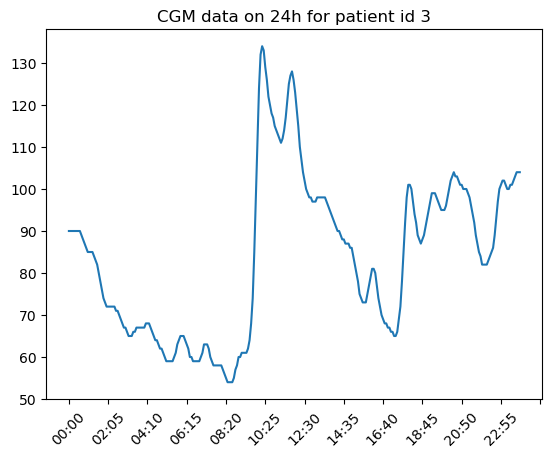

In [32]:
fig, ax = plt.subplots(1, 1) 
plt.title("CGM data on 24h for patient id 3")
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.plot(cgm_24h.loc["3_1"])
plt.xticks(rotation=45)

We consider only 24h for patients for the statistics, and merge the data with labels diabetic or not.

In [41]:
cgm_patients = cgm_24h[cgm_24h.index.str.contains('_1')]
_, lbl = _read_clinical_data_and_labels(path='../')

In [42]:
cgm_patients

,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,00:45,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55
1_1,86.0,81.0,78.0,76.0,76.0,77.0,78.0,80.0,81.0,82.0,...,148.0,147.0,145.0,142.0,139.0,134.0,129.0,123.0,117.0,111.0
2_1,167.0,163.0,158.0,151.0,144.0,137.0,132.0,127.0,125.0,125.0,...,108.0,106.0,103.0,100.0,97.0,95.0,94.0,95.0,97.0,99.0
3_1,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,89.0,88.0,...,101.0,100.0,100.0,101.0,101.0,102.0,103.0,104.0,104.0,104.0
4_1,93.0,92.0,92.0,91.0,92.0,93.0,95.0,98.0,101.0,103.0,...,108.0,109.0,110.0,110.0,111.0,111.0,112.0,113.0,114.0,115.0
5_1,107.0,109.0,111.0,114.0,116.0,116.0,116.0,115.0,113.0,110.0,...,107.0,103.0,99.0,97.0,95.0,95.0,98.0,102.0,108.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204_1,140.0,140.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,142.0,...,137.0,136.0,136.0,134.0,133.0,132.0,132.0,131.0,132.0,132.0
205_1,159.0,160.0,161.0,161.0,161.0,159.0,155.0,150.0,144.0,136.0,...,139.0,147.0,157.0,166.0,176.0,185.0,194.0,201.0,207.0,211.0
206_1,113.0,111.0,110.0,110.0,110.0,110.0,111.0,111.0,111.0,112.0,...,96.0,98.0,99.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0
207_1,97.0,99.0,101.0,102.0,105.0,108.0,112.0,116.0,119.0,119.0,...,116.0,114.0,111.0,108.0,106.0,107.0,108.0,109.0,110.0,111.0


**Extract some features on CGM time series data for each patient**

In [71]:
df_stat = pd.DataFrame({}, index=cgm_patients.index)
df_stat['lbl'] = lbl

In [63]:
# create a dataframe with different features (classicial descriptive statistics functions)
df_stat['cgm_mean'] = list(cgm_patients.mean(axis=1))
df_stat['cgm_std'] = list(cgm_patients.std(axis=1))
df_stat['cgm_max'] = list(cgm_patients.max(axis=1))
df_stat['cgm_min'] = list(cgm_patients.min(axis=1))

<AxesSubplot:xlabel='lbl', ylabel='cgm_max'>

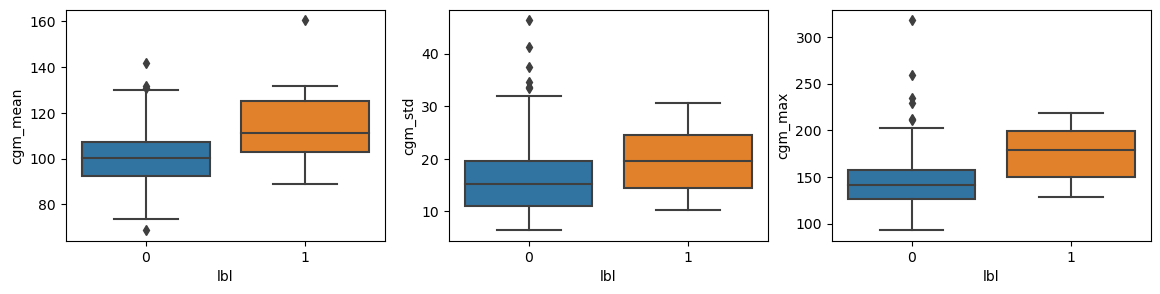

In [61]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(data=df_stat, x='lbl', y="cgm_mean")
plt.subplot(1,3,2)
sns.boxplot(data=df_stat, x='lbl', y="cgm_std")
plt.subplot(1,3,3)
sns.boxplot(data=df_stat, x='lbl', y="cgm_max")

We can see that descriptive statistics of the CGM time series could be use for differenciation between diabetic and non diabetic patients. Diabetic patients tend to have a higher mean of glucose value during the day, and reach probably a higher maximum than non diabetic values.

In [78]:
# implement other metrics : percentage of time in certain ranges of values
def compute_average_time_in_range(cgm_val, normal_range=[70, 110]):
    col_in_range = cgm_val[(cgm_val >= normal_range[0]) & (cgm_val <= normal_range[1])]
    return len(col_in_range)/len(cgm_val)

def compute_average_time_below(cgm_val, value=70):
    col_below = cgm_val[(cgm_val < value)]
    return len(col_below)/len(cgm_val)

def compute_average_time_above(cgm_val, value=110):
    col_above = cgm_val[(cgm_val > value)]
    return len(col_above)/len(cgm_val)

In [80]:
df_stat["cgm_normal_range"] = cgm_patients.apply(compute_average_time_in_range, axis=1)
df_stat["cgm_under_range"] = cgm_patients.apply(compute_average_time_below, axis=1)
df_stat["cgm_above_range"] = cgm_patients.apply(compute_average_time_above, axis=1)

<AxesSubplot:xlabel='lbl', ylabel='cgm_above_range'>

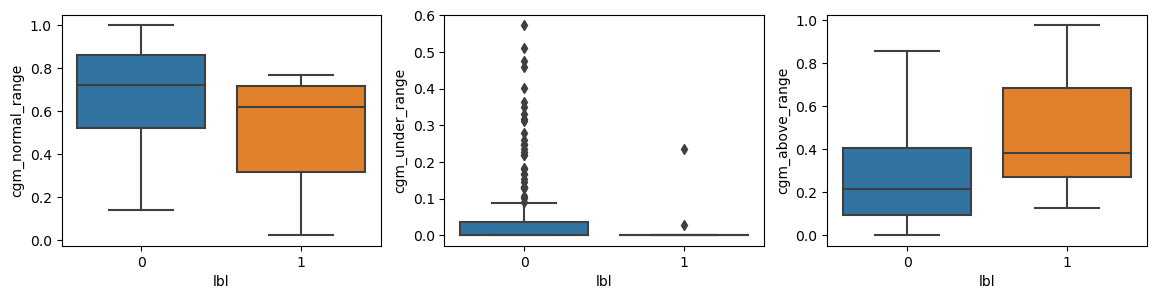

In [83]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(data=df_stat, x='lbl', y="cgm_normal_range")
plt.subplot(1,3,2)
sns.boxplot(data=df_stat, x='lbl', y="cgm_under_range")
plt.subplot(1,3,3)
sns.boxplot(data=df_stat, x='lbl', y="cgm_above_range")

AUC/Caractéristiques DFA ?